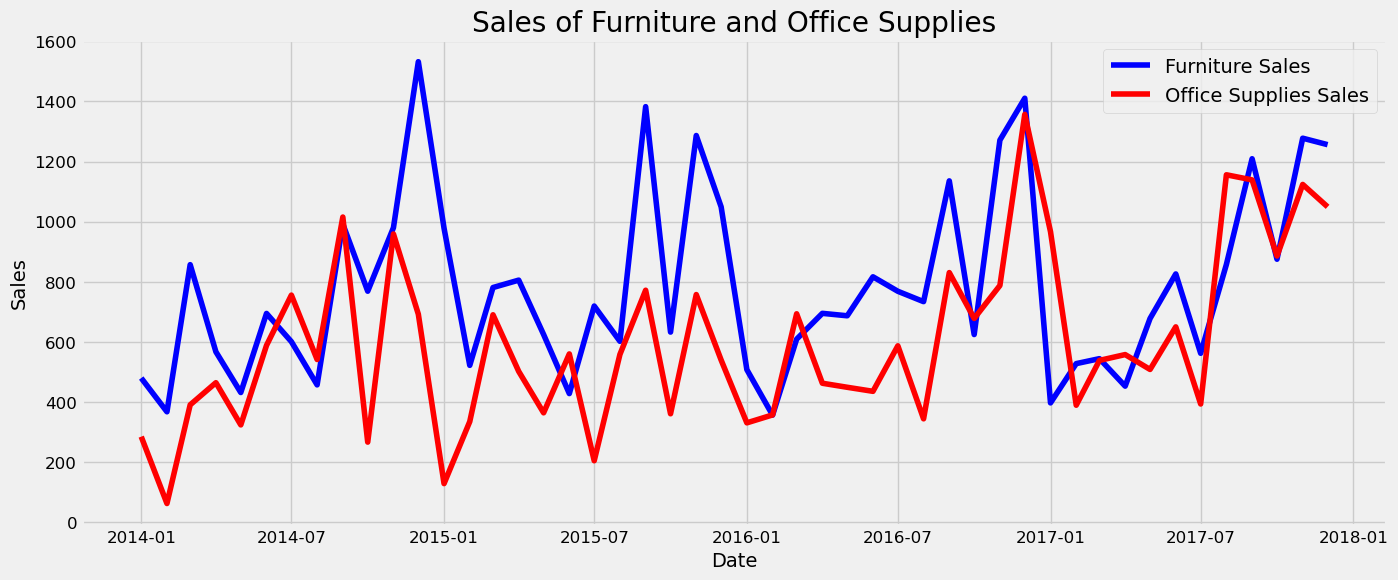

Office supplies first time produced higher sales than furniture is 2014-07-01.


In [3]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

# Set plotting style and suppress warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

# Read the sales data from an Excel file
df = pd.read_excel(r"C:/Users/djnag/Downloads/Sample-Superstore.xlsx")

# Filter the data for 'Furniture' and 'Office Supplies'
furniture = df[df['Category'] == 'Furniture']
office = df[df['Category'] == 'Office Supplies']

# Extract the relevant columns and group by order date
furniture = furniture[['Order Date', 'Sales']].groupby('Order Date').sum()
office = office[['Order Date', 'Sales']].groupby('Order Date').sum()

# Ensure the index is a DatetimeIndex
furniture.index = pd.to_datetime(furniture.index)
office.index = pd.to_datetime(office.index)

# Resample the data to monthly averages
furniture_monthly = furniture.resample('MS').mean()
office_monthly = office.resample('MS').mean()

# Plot the sales data for furniture and office supplies
plt.figure(figsize=(15, 6))
plt.plot(furniture_monthly.index, furniture_monthly['Sales'], label='Furniture Sales', color='blue')
plt.plot(office_monthly.index, office_monthly['Sales'], label='Office Supplies Sales', color='red')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales of Furniture and Office Supplies')
plt.legend()
plt.show()

# Identify the date when office supplies first exceeded furniture sales
combined = furniture_monthly.join(office_monthly, lsuffix='_furniture', rsuffix='_office')
first_date = combined[combined['Sales_office'] > combined['Sales_furniture']].index.min()

print("Office supplies first time produced higher sales than furniture is {}.".format(first_date.date()))

